# WEB SCRAPING ASSIGNMENT-3

In [1]:
#importing the required library
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from selenium import webdriver
import pandas as pd
import numpy as np
import time
import urllib
import os

In [7]:
import selenium
from selenium import webdriver
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
import time
from selenium.common.exceptions import StaleElementReferenceException,NoSuchElementException

***Q1-Write a python program which searches all the product under a particular product from
www.amazon.in. The product name to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars***

In [2]:
def get_url(search_term,page_no=1):
    """Generate a URL for search Term with page number"""
    template = 'https://www.amazon.in/s?k={}&page={}&qid=1618507666&ref=sr_pg_{}'
    search_term = search_term.replace(' ','+')
    return template.format(search_term, page_no, page_no)

In [3]:
driver = webdriver.Chrome() 
url = get_url('mobile phones under 20K') #Getting the URL from the above defined function and opening in webdriver.
driver.get(url)
time.sleep(5)
driver.close()

***Q2-In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then scrape all the products available under that product name. Details to be scraped are: "Brand Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.***

In [8]:
def search_item(search_term):
    """Main Function"""
       
    product = []
    Rating = []
    No_of_Ratings = []
    HREFF = []
    Price = []
    exchange_discount = []
    Expected_Delivery = []
    other_details = []
    

    for i in range(1,4):     #Starting up web-driver.
        driver = webdriver.Chrome()
        url = get_url(search_term, i)
        driver.get(url)
    
        for i in driver.find_elements(By.XPATH,"//h2/a"):
            HREFF.append(i.get_attribute('href')) #Getting href from the driver
        driver.close()
    
    for i in HREFF: #Using href scraping the required detail.
        driver = webdriver.Chrome()
        driver.get(i)
        driver.maximize_window()
    
        product.append(driver.find_element(By.XPATH,"//h1[@id = 'title']").text)#Scraping product details
        try: #Scraping Price details
            Price.append(driver.find_element(By.XPATH,"//span[@id = 'priceblock_dealprice']").text)
        except:
            try:
                Price.append(driver.find_element(By.XPATH,"//span[@id = 'priceblock_ourprice']").text)  
            except:
                Price.append("Out Of Stock")
            
        try:#Scraping Delivery details
            Expected_Delivery.append(driver.find_element(By.XPATH,"//div[@id = 'ddmDeliveryMessage']/b").text) 
        except:
            Expected_Delivery.append('-')
    
        try:#Scraping exchange details
            exchange_discount.append(driver.find_element(By.XPATH,"//div[@id = 'maxBuyBackDiscountSection']/span/span[@class = 'a-color-price']").text)
        except:
            exchange_discount.append('-')
         
        try:#Scraping Other product details details
            other_details.append(driver.find_element(By.XPATH,"//ul[@class = 'a-unordered-list a-vertical a-spacing-mini']").text) 
        except:
            other_details.append('-')
            
    
        driver.get(i+'#customerReviews')
       
        try:#Scraping ratings details
            Rating.append(driver.find_element(By.XPATH,"//span[@class = 'a-size-medium a-color-base']").text)
            No_of_Ratings.append(driver.find_element(By.XPATH,"//div[@data-hook = 'total-review-count']/span[@class = 'a-size-base a-color-secondary']").text)
        except:
            Rating.append('-')
            No_of_Ratings.append('-')    
    
        driver.close()
        
    brand = [i.split(' ')[:2]for i in product] #from Product details spliting the Brand
    brand = [brand[i][0]+' '+ brand[i][1] for i in range(len(brand))]
        
    Iteams = pd.DataFrame({'Brand_name': brand, #Creating DataFrame
                           'Product':product,
                           'Rating': Rating,
                           'No_of_Ratings': No_of_Ratings,
                           'Price': Price, 
                           'exchange_discount': exchange_discount, 
                           'Expected_Delivery' : Expected_Delivery, 
                           'URL':HREFF,
                           'other_details':other_details })
    
    Iteams.to_csv(f"{'Amazon searched '+search_term}.csv",index=False) #Creating CSV
    
    return Iteams

In [9]:
search_item("Smart TV") #calling the Function.
pd.read_csv("Amazon searched Smart TV.csv") #opening the saved CSV file.

,Brand_name,Product,Rating,No_of_Ratings,Price,exchange_discount,Expected_Delivery,URL,other_details
0,Acer 100,Acer 100 cm (40 inches) P Series Full HD Andro...,4.3 out of 5,139 global ratings,Out Of Stock,-,-,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,Resolution: Full HD (1920x1080) | Refresh Rate...
1,AmazonBasics 139,AmazonBasics 139 cm (55 inches) 4K Ultra HD Sm...,3.9 out of 5,"3,372 global ratings",Out Of Stock,-,-,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,Resolution: 4K Ultra HD (3840 x 2160) | Refres...
2,Acer 100,Acer 100 cm (40 inches) P Series Full HD Andro...,4.3 out of 5,139 global ratings,Out Of Stock,-,-,https://www.amazon.in/Acer-inches-Android-Smar...,Resolution: Full HD (1920x1080) | Refresh Rate...
3,Karbonn 80,Karbonn 80 cm (32 Inches) Millennium Series HD...,3.9 out of 5,251 global ratings,Out Of Stock,-,-,https://www.amazon.in/Karbonn-Millennium-KJW32...,NaN
4,OnePlus 108,OnePlus 108 cm (43 inches) Y Series 4K Ultra H...,4.2 out of 5,"3,958 global ratings",Out Of Stock,-,-,https://www.amazon.in/OnePlus-43-inches-Androi...,Resolution : 4K Ultra HD (3840x2160) | Refresh...
...,...,...,...,...,...,...,...,...,...
69,Samsung 108,Samsung 108 cm (43 inches) Wondertainment Seri...,4.3 out of 5,"16,808 global ratings",Out Of Stock,-,-,https://www.amazon.in/Samsung-inches-Smart-UA4...,Resolution: Full HD (1920x1080) | Refresh Rate...
70,Samsung 108,Samsung 108 cm (43 inches) Crystal 4K Neo Seri...,4.3 out of 5,"10,181 global ratings",Out Of Stock,-,-,https://www.amazon.in/Samsung-inches-Crystal-U...,Resolution : Crystal 4K Ultra HD (3840 x 2160)...
71,Vu 108,Vu 108 cm (43 Inches) Premium 4K Series 4K Ult...,4.3 out of 5,"2,817 global ratings",Out Of Stock,-,-,https://www.amazon.in/Inches-Premium-Smart-And...,Resolution : 4K Ultra HD (3840x2160) | Refresh...
72,Samsung 80,Samsung 80 cm (32 Inches) Wondertainment Serie...,4.3 out of 5,"16,809 global ratings",Out Of Stock,-,-,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,Resolution: HD Ready (1366x768) | Refresh Rate...


***Q3-Write a python program to access the search bar and search button on images.google.com and scrape 10 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’***

In [14]:
# import required libraries
import pandas as pd
import selenium
import time 
# import selenium webdriver
from selenium import webdriver
# importing required exceptions which need to handled
from selenium.common.exceptions import StaleElementReferenceException,NoSuchElementException
# importing regex
import re
from selenium.webdriver.common.by import By
import urllib

In [15]:
driver = webdriver.Chrome('chromedriver.exe')

In [17]:
# open automated chrome window
driver.get('https://www.google.com/')

In [18]:
search_button = driver.find_element(By.XPATH,'/html/body/div[1]/div[1]/div/div/div/div[1]/div/div[2]/a')
search_button.click()

In [19]:
search_field_image = driver.find_element(By.XPATH,'//input[@class="gLFyf"]')
search_field_image.send_keys('images of fruits')


In [20]:
search_button = driver.find_element(By.XPATH,'//span[@class="z1asCe MZy1Rb"]')
search_button.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
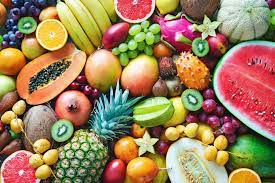
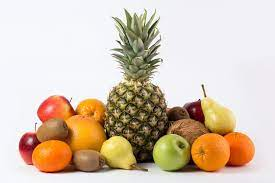
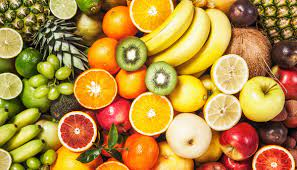
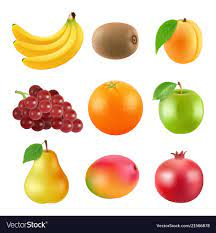
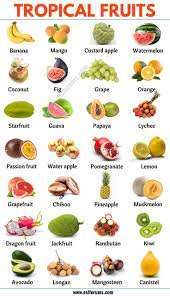
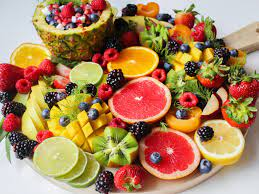
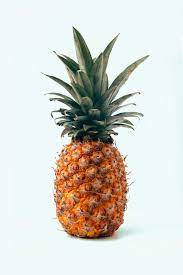
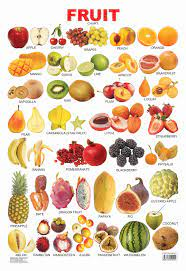
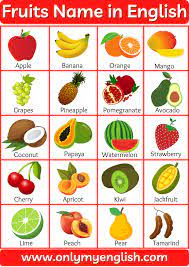
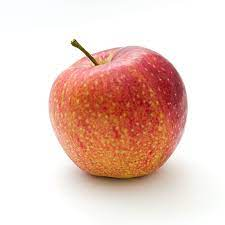

In [21]:
# extracting fruits images
fruits_images = []
try:
    fruits = driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
    for i in fruits[0:10]:
        fruits_images.append(i.get_attribute('src'))
except NoSuchElementException:
    fruits_images.append('-')
fruits_images    

In [22]:
# download the images
fruits=[]
for i in range(10):    
    f=urllib.request.urlretrieve(str(fruits_images[i]),"Downloads/images of fruits{}.jpg".format(i))
    for j in f:
        fruits.append(j)
fruits   

['Downloads/images of fruits0.jpg',
 'Downloads/images of fruits1.jpg',
 'Downloads/images of fruits2.jpg',
 'Downloads/images of fruits3.jpg',
 'Downloads/images of fruits4.jpg',
 'Downloads/images of fruits5.jpg',
 'Downloads/images of fruits6.jpg',
 'Downloads/images of fruits7.jpg',
 'Downloads/images of fruits8.jpg',
 'Downloads/images of fruits9.jpg',

In [23]:
search_field_image = driver.find_element(By.XPATH,'//input[@class="og3lId"]')
search_field_image.clear()

In [24]:
search_field_image = driver.find_element(By.XPATH,'/html/body/c-wiz/c-wiz/div/div[3]/div[2]/div/div[1]/form/div[1]/div[2]/div/div[2]/input')
search_field_image.send_keys('images of cars')

In [25]:
search_button = driver.find_element(By.XPATH,'//button[@class="rCGXm"]')
search_button.click()  

In [26]:
# extracting cars images
cars_images = []
try:
    cars = driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
    for i in cars[0:10]:
        cars_images.append(i.get_attribute('src'))
except StaleElementReferenceException:
    cars_images.append('-') 

In [27]:
# download the images
cars=[]
for i in range(10):    
    c=urllib.request.urlretrieve(str(cars_images[i]),"Downloads/images of cars{}.jpg".format(i))
    for j in c:
        cars.append(j)
cars   

['Downloads/images of cars0.jpg',
 'Downloads/images of cars1.jpg',
 'Downloads/images of cars2.jpg',
 'Downloads/images of cars3.jpg',
 'Downloads/images of cars4.jpg',
 'Downloads/images of cars5.jpg',
 'Downloads/images of cars6.jpg',
 'Downloads/images of cars7.jpg',
 'Downloads/images of cars8.jpg',
 'Downloads/images of cars9.jpg',

In [28]:
# extracting cakes images
cakes_images = []
try:
    cakes = driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
    for i in cakes[0:10]:
        cakes_images.append(i.get_attribute('src'))
except NoSuchElementException:
    cakes_images.append('-')
    

In [29]:
# download the images
cakes=[]
for i in range(10):    
    ca=urllib.request.urlretrieve(str(cakes_images[i]),"Downloads/images of cakes{}.jpg".format(i))
    for j in ca:
        cakes.append(j)
cakes   

['Downloads/images of cakes0.jpg',
 'Downloads/images of cakes1.jpg',
 'Downloads/images of cakes2.jpg',
 'Downloads/images of cakes3.jpg',
 'Downloads/images of cakes4.jpg',
 'Downloads/images of cakes5.jpg',
 'Downloads/images of cakes6.jpg',
 'Downloads/images of cakes7.jpg',
 'Downloads/images of cakes8.jpg',
 'Downloads/images of cakes9.jpg',

In [30]:
search_field_clear = driver.find_element(By.XPATH,'//input[@class="og3lId"]')
search_field_clear.clear()

In [31]:
search_field_image = driver.find_element(By.XPATH,'/html/body/c-wiz/c-wiz/div/div[3]/div[2]/div/div[1]/form/div[1]/div[2]/div/div[2]/input')
search_field_image.send_keys('images of Guitar')

In [32]:
search_button = driver.find_element(By.XPATH,'//button[@class="rCGXm"]')
search_button.click()    

In [33]:
# extracting Guitar images
guitar_images = []
try:
    guitar = driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
    for i in guitar[0:10]:
        guitar_images.append(i.get_attribute('src'))
except StaleElementReferenceException:
    guitar_images.append('-')
    

In [34]:
# download the images
guitar=[]
for i in range(10):    
    g=urllib.request.urlretrieve(str(guitar_images[i]),"Downloads/images of Guitar{}.jpg".format(i))
    for j in g:
        guitar.append(j)
guitar   

['Downloads/images of Guitar0.jpg',
 'Downloads/images of Guitar1.jpg',
 'Downloads/images of Guitar2.jpg',
 'Downloads/images of Guitar3.jpg',
 'Downloads/images of Guitar4.jpg',
 'Downloads/images of Guitar5.jpg',
 'Downloads/images of Guitar6.jpg',
 'Downloads/images of Guitar7.jpg',
 'Downloads/images of Guitar8.jpg',
 'Downloads/images of Guitar9.jpg',

In [35]:
search_field_clear = driver.find_element(By.XPATH,'//input[@class="og3lId"]')
search_field_clear.clear()

In [36]:
search_field_image = driver.find_element(By.XPATH,'/html/body/c-wiz/c-wiz/div/div[3]/div[2]/div/div[1]/form/div[1]/div[2]/div/div[2]/input')
search_field_image.send_keys('images of Machine Learning')

In [37]:
search_button = driver.find_element(By.XPATH,'//button[@class="rCGXm"]')
search_button.click()   

In [38]:
# extracting Machine Learning images
ML_images = []
try:
    ML = driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
    for i in ML[0:10]:
        ML_images.append(i.get_attribute('src'))
except StaleElementReferenceException:
    ML_images.append('-')    

In [39]:
# download the images
ML=[]
for i in range(10):    
    m=urllib.request.urlretrieve(str(ML_images[i]),"Downloads/images of Machine Learning{}.jpg".format(i))
    for j in m:
        ML.append(j)
ML   

['Downloads/images of Machine Learning0.jpg',
 'Downloads/images of Machine Learning1.jpg',
 'Downloads/images of Machine Learning2.jpg',
 'Downloads/images of Machine Learning3.jpg',
 'Downloads/images of Machine Learning4.jpg',
 'Downloads/images of Machine Learning5.jpg',
 'Downloads/images of Machine Learning6.jpg',
 'Downloads/images of Machine Learning7.jpg',
 'Downloads/images of Machine Learning8.jpg',
 'Downloads/images of Machine Learning9.jpg',

In [40]:
driver.close()

# Q4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) onwww.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV. 

In [41]:
# import required libraries
import pandas as pd
import selenium
import time 
# import selenium webdriver
from selenium import webdriver
# importing required exceptions which need to handled
from selenium.common.exceptions import StaleElementReferenceException,NoSuchElementException
# importing regex
import re
from selenium.webdriver.common.by import By
driver = webdriver.Chrome('chromedriver.exe')
driver.maximize_window()

In [42]:
driver.get('https://www.flipkart.com/')

In [43]:
search_field = driver.find_element(By.CLASS_NAME,'_3704LK')
search_field.send_keys('Oneplus Nord')


In [44]:
search_button = driver.find_element(By.CLASS_NAME,'L0Z3Pu')
search_button.click()

***Extracting Brand Name***

In [45]:
# Let's extract all web elements having brand name
brand_name= []
try:
    brand_tag = driver.find_elements(By.XPATH,'//div[@class="_4rR01T"]')
    for i in brand_tag:
        brand_name.append(i.text.split(' ')[0])
except NoSuchElementException:
    brand_name.append('-')   

***Extracting Smartphone***

In [47]:
#Let's extract all web elements having smartphone name
smartphone_name= []
try:
    smartphone_tag = driver.find_elements(By.XPATH,'//div[@class="_4rR01T"]')
    for i in smartphone_tag:
        smartphone_name.append(i.text.split('(')[0])
except NoSuchElementException:
    smartphone_name.append('-')   

***Extracting  Colour and ROM***


In [48]:
# Let's extract all web elements having colour
colour= []
try:
    colour_tag = driver.find_elements(By.XPATH,'//div[@class="_4rR01T"]')
    for i in colour_tag:
        colour.append(i.text.split('(')[1])
except NoSuchElementException:
    colour.append('-')    

In [49]:
# Let's extract all web elements having RAM
RAM= []
try:
    RAM_tag = driver.find_elements(By.XPATH,'//ul[@class="_1xgFaf"]')
    for i in RAM_tag:
        RAM.append(i.text.split('|')[0])
except NoSuchElementException:
    RAM.append('-')    

In [50]:
# Let's extract all web elements having Display
display= []
try:
    display_tag = driver.find_elements(By.XPATH,'//ul[@class="_1xgFaf"]')
    for i in display_tag:
        display.append(i.text.split('\n')[1])
except NoSuchElementException:
    display.append('-')   

In [51]:
# Let's extract all web elements having Camera
camera= []
try:
    camera_tag = driver.find_elements(By.XPATH,'//ul[@class="_1xgFaf"]')
    for i in camera_tag:
        camera.append(i.text.split('\n')[2])
except NoSuchElementException:
    camera.append('-')    

In [52]:
# Let's extract all web elements having battery capacity
battery= []
try:
    battery_tag = driver.find_elements(By.XPATH,'//ul[@class="_1xgFaf"]')
    for i in battery_tag:
        battery.append(i.text.split('\n')[3])
except NoSuchElementException:
    battery.append('-')  

In [53]:
# Let's extract all web elements having price
price= []
try:
    price_tag = driver.find_elements(By.XPATH,'//div[@class="_30jeq3 _1_WHN1"]')
    for i in price_tag:
        price.append(i.text)
except NoSuchElementException:
    price.append('-')    

In [54]:
# Let's extract all web elements having product url
p_url= []
try:
    p_url_tag = driver.find_elements(By.XPATH,'//a[@class="_1fQZEK"]')
    for i in p_url_tag:
        p_url.append(i.get_attribute('href'))
except NoSuchElementException:
    p_url.append('-')    

In [55]:
df = pd.DataFrame({'Brand Name':brand_name,'Smartphone Name':smartphone_name,'Colour & ROM':colour,'RAM':RAM,'Camera':camera,'Display Size':display,'Battery Capacity':battery,'Price':price,'Product URL':p_url})
df

,Brand Name,Smartphone Name,Colour & ROM,RAM,Camera,Display Size,Battery Capacity,Price,Product URL
0,OnePlus,OnePlus Nord CE 2 Lite 5G,"Blue Tide, 128 GB)",6 GB RAM,64MP Rear Camera | 16MP Front Camera,16.74 cm (6.59 inch) HD+ Display,5000 mAh Battery,"₹19,799",https://www.flipkart.com/oneplus-nord-ce-2-lit...
1,OnePlus,OnePlus Nord CE 2 Lite 5G,"Blue Tide, 128 GB)",6 GB RAM,64MP Rear Camera,16.74 cm (6.59 inch) Display,5000 mAh Battery,"₹19,754",https://www.flipkart.com/oneplus-nord-ce-2-lit...
2,OnePlus,OnePlus Nord CE 2 Lite 5G,"Black Dusk, 128 GB)",6 GB RAM,64MP Rear Camera,16.74 cm (6.59 inch) Display,5000 mAh Battery,"₹19,991",https://www.flipkart.com/oneplus-nord-ce-2-lit...
3,OnePlus,OnePlus Nord 2T 5G,"Jade Fog, 128 GB)",8 GB RAM,50MP Rear Camera,17.02 cm (6.7 inch) Display,4500 mAh Battery,"₹28,849",https://www.flipkart.com/oneplus-nord-2t-5g-ja...
4,OnePlus,OnePlus Nord CE 2 Lite 5G,"Blue Tide, 128 GB)",6 GB RAM,64MP Rear Camera,16.74 cm (6.59 inch) Display,5000 mAh Battery,"₹19,448",https://www.flipkart.com/oneplus-nord-ce-2-lit...
5,OnePlus,OnePlus Nord CE 2 Lite 5G,"Blue Tide, 128 GB)",6 GB RAM,64MP Rear Camera,16.74 cm (6.59 inch) Display,5000 mAh Battery,"₹19,534",https://www.flipkart.com/oneplus-nord-ce-2-lit...
6,OnePlus,OnePlus Nord 2T 5G,"Jade Fog, 256 GB)",12 GB RAM,50MP Rear Camera,17.02 cm (6.7 inch) Display,4500 mAh Battery,"₹33,900",https://www.flipkart.com/oneplus-nord-2t-5g-ja...
7,OnePlus,OnePlus Nord N20 SE,"Blue Oasis, 64 GB)",4 GB RAM,50MP Rear Camera,16.66 cm (6.56 inch) Display,5000 mAh Battery,"₹14,885",https://www.flipkart.com/oneplus-nord-n20-se-b...
8,OnePlus,OnePlus Nord N20 SE,"Celestial Black, 64 GB)",4 GB RAM,50MP Rear Camera,16.66 cm (6.56 inch) Display,5000 mAh Battery,"₹14,747",https://www.flipkart.com/oneplus-nord-n20-se-c...
9,OnePlus,OnePlus Nord 2T 5G,"Gray Shadow, 256 GB)",12 GB RAM,50MP Rear Camera,17.02 cm (6.7 inch) Display,4500 mAh Battery,"₹33,860",https://www.flipkart.com/oneplus-nord-2t-5g-gr...


In [56]:
df.to_csv('Oneplus Nord.csv')

In [57]:
data = pd.read_csv('Oneplus Nord.csv')
data.head()

,Unnamed: 0,Brand Name,Smartphone Name,Colour & ROM,RAM,Camera,Display Size,Battery Capacity,Price,Product URL
0,0,OnePlus,OnePlus Nord CE 2 Lite 5G,"Blue Tide, 128 GB)",6 GB RAM,64MP Rear Camera | 16MP Front Camera,16.74 cm (6.59 inch) HD+ Display,5000 mAh Battery,"₹19,799",https://www.flipkart.com/oneplus-nord-ce-2-lit...
1,1,OnePlus,OnePlus Nord CE 2 Lite 5G,"Blue Tide, 128 GB)",6 GB RAM,64MP Rear Camera,16.74 cm (6.59 inch) Display,5000 mAh Battery,"₹19,754",https://www.flipkart.com/oneplus-nord-ce-2-lit...
2,2,OnePlus,OnePlus Nord CE 2 Lite 5G,"Black Dusk, 128 GB)",6 GB RAM,64MP Rear Camera,16.74 cm (6.59 inch) Display,5000 mAh Battery,"₹19,991",https://www.flipkart.com/oneplus-nord-ce-2-lit...
3,3,OnePlus,OnePlus Nord 2T 5G,"Jade Fog, 128 GB)",8 GB RAM,50MP Rear Camera,17.02 cm (6.7 inch) Display,4500 mAh Battery,"₹28,849",https://www.flipkart.com/oneplus-nord-2t-5g-ja...
4,4,OnePlus,OnePlus Nord CE 2 Lite 5G,"Blue Tide, 128 GB)",6 GB RAM,64MP Rear Camera,16.74 cm (6.59 inch) Display,5000 mAh Battery,"₹19,448",https://www.flipkart.com/oneplus-nord-ce-2-lit...


In [58]:
driver.close()

# 5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps


In [59]:
# import required libraries
import pandas as pd
import selenium
import time 
# import selenium webdriver
from selenium import webdriver
# importing required exceptions which need to handled
from selenium.common.exceptions import StaleElementReferenceException,NoSuchElementException
# importing regex
import re
from selenium.webdriver.common.by import By
driver = webdriver.Chrome('chromedriver.exe')
driver.maximize_window()

In [60]:
driver.get('https://www.google.com/')

In [61]:
search_field = driver.find_element(By.XPATH,'//input[@class="gLFyf"]')
search_field.send_keys('Rohtak geospatial coordinates')

In [64]:
search_button = driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[4]/center/input[1]')
search_button.click()

In [65]:
longitude = []
longitud = driver.find_elements(By.XPATH,'//span[@class="LrzXr kno-fv wHYlTd z8gr9e"]')
for i in longitud:
    longitude.append(i.text.split(',')[:1])
longitude    


[['76.606613'],
 ['28.895515'],
 ["28° 53' 43.8540'' N"],
 ["76° 36' 23.8068'' E"]]

In [66]:
df = pd.DataFrame({"Longitude_RTK_CITY":longitude[0]})
df

,Longitude_RTK_CITY
0,76.606613


In [67]:
df_1= pd.DataFrame({'Latitude_RTK_CITY':longitude[1]})
df_1

,Latitude_RTK_CITY
0,28.895515


In [68]:
df_1['Longitude_RTK_CITY']=df['Longitude_RTK_CITY']
df_1

,Latitude_RTK_CITY,Longitude_RTK_CITY
0,28.895515,76.606613


In [69]:
driver.close()

# Q6. Write a program to scrap details of all the funding deals for second quarter (i.e Jan 21 – March 21) from trak.in.


In [70]:
# import required libraries
import pandas as pd
import selenium
import time 
# import selenium webdriver
from selenium import webdriver
# importing required exceptions which need to handled
from selenium.common.exceptions import StaleElementReferenceException,NoSuchElementException
# importing regex
import re
from selenium.webdriver.common.by import By
driver = webdriver.Chrome('chromedriver.exe')
driver.maximize_window()

In [71]:
driver.get('https://trak.in/')

In [72]:
more_button = driver.find_element(By.XPATH,'/html/body/div[1]/header/div[2]/div/div/div/div/nav/ul/li[9]/a')
more_button.click()

In [76]:
# Let's extract all web elements having Date
date= []
try:
    date_tag = driver.find_elements(By.XPATH,'//td[@class="column-2"]')
    for i in date_tag[5:29]:
        date.append(i.text)
except NoSuchElementException:
    date.append('-') 
date    

['04/03/2021',
 '31/03/2021',
 '30/03/2021',
 '30/03/2021',
 '23/03/2021',
 '25/03/2021',
 '26/03/2021',
 '11/02/2021',
 '22/02/2021',
 '19/02/2021',
 '17/02/2021',
 '15/02/2021',
 '12/02/2021',
 '12/02/2021',
 '09/02/2021',
 '09/02/2021',
 '15/01/2021',
 '28/01/2021',
 '19/01/2021',
 '19/01/2021',
 '18/01/2021',
 '18/01/2021',
 '11/01/2021',
 '13/01/2021']

In [77]:
# Let's extract all web elements having Startup name
startup= []
try:
    startup_tag = driver.find_elements(By.XPATH,'//td[@class="column-3"]')
    for i in startup_tag[5:29]:
        startup.append(i.text)
except NoSuchElementException:
    startup.append('-') 
startup    

['DealShare',
 'Uniphore',
 'Dunzo',
 'BYJU’S',
 'SkilloVilla',
 'CityMall',
 'DotPe',
 'Doubtnut',
 'Zomato',
 'Fingerlix',
 'Zolve',
 'KreditBee',
 'Pepperfry',
 'Grofers',
 'Nothing',
 'SplashLearn',
 'Digit Insurance',
 'Bombay Shaving Company',
 'DeHaat',
 'Darwinbox',
 'mfine',
 'Udayy',
 'True Elements',
 'Saveo']

In [78]:
# Let's extract all web elements having industry
industry= []
try:
    industry_tag = driver.find_elements(By.XPATH,'//td[@class="column-4"]')
    for i in industry_tag[5:29]:
        industry.append(i.text)
except NoSuchElementException:
    industry.append('-') 
industry    

['E-commerce',
 'Technology',
 'E-commerce',
 'Edu-tech',
 'Edu-tech',
 'E-commerce',
 'FinTech',
 'Edu Tech',
 'Hospitality',
 'Hospitality',
 'FinTech',
 'Finance',
 'E-commerce',
 'E-Commerce',
 'Technology',
 'EdTech',
 'Financial Services',
 'Consumer Goods Company',
 'AgriTech Startup',
 'SaaS',
 'Health Tech Startup',
 'EdTech',
 'Food Startup',
 'B2B E-commerce']

In [79]:
# Let's extract all web elements having Sub-Vertical
vertical= []
try:
    vertical_tag = driver.find_elements(By.XPATH,'//td[@class="column-5"]')
    for i in vertical_tag[5:29]:
        vertical.append(i.text)
except NoSuchElementException:
    vertical.append('-') 
vertical    

['Online shopping platform',
 'Conversational Service Automation (CSA)',
 'Hyper-local delivery app',
 'Online tutoring',
 'Career and job-oriented upskilling.',
 'Social ecommerce and online grocery platform',
 'Commerce and payments platform to offline enterprise businesses.',
 'E-Learning Platform',
 'Online Food Delivery Platform',
 'Semi-cooked food delivery app',
 'Global Neobank Venture',
 'Digital lending platform',
 'Multi-brand furniture brand',
 'Online supermarket',
 'Consumer Technology Venture',
 'Game-based learning programme',
 'Insurance Services',
 'Shave care, beard care, and skincare products',
 'online marketplace for farm products and services',
 'HR Tech',
 'AI-powered telemedicine mobile app',
 'Online learning platform for kids in class 1-5',
 'Whole Food plant based Nashta',
 'Pharmacies']

In [80]:
# Let's extract all web elements having city/location
city= []
try:
    city_tag = driver.find_elements(By.XPATH,'//td[@class="column-6"]')
    for i in city_tag[5:29]:
        city.append(i.text)
except NoSuchElementException:
    city.append('-') 
city    

['Jaipur, Rajasthan',
 'Palo Alto',
 'Bengaluru',
 'Bengaluru',
 'Bengaluru',
 'Gurgaon',
 'Gurgaon',
 'Gurgaon',
 'Gurgaon',
 'Mumbai',
 'Mumbai',
 'Bengaluru',
 'Mumbai',
 'Gurgaon',
 'London',
 'Gurgaon',
 'Bengaluru',
 'New Delhi',
 'Patna',
 'Mumbai',
 'Bengaluru',
 'Gurgaon',
 'Pune',
 'Bengaluru']

In [81]:
# Let's extract all web elements having investor's name
investor= []
try:
    investor_tag = driver.find_elements(By.XPATH,'//td[@class="column-7"]')
    for i in investor_tag[5:29]:
        investor.append(i.text)
except NoSuchElementException:
    investor.append('-') 
investor    

['Innoven Capital',
 'Sorenson Capital Partners',
 'Krishtal Advisors Pte Ltd',
 'MC Global Edtech, B Capital, Baron, others',
 'Titan Capital, others',
 'Accel Partners',
 'PayU',
 'SIG Global, Sequoia Capital, WaterBridge Ventures and ON Mauritius',
 'Tiger Global, Kora',
 'Rhodium Trust, Accel Partners and Swiggy',
 'Accel Partners and Lightspeed Venture Partners',
 'Azim Premji’s PremjiInvest and South Korea’s Mirae Asset Venture',
 'InnoVen Capital',
 'SoftBank Vision Fund (SVF)',
 'GV',
 'Owl Ventures',
 'A91 Partners, Faering Capital, TVS Capital Funds',
 'Reckitt Benckiser',
 'Prosus Ventures',
 'Salesforce Ventures',
 'Heritas Capital Management',
 'Sequoia Capital',
 'SIDBI Venture Capital',
 'Matrix Partners India, RTP Global, others']

In [82]:
# Let's extract all web elements having investment type
investment= []
try:
    investment_tag = driver.find_elements(By.XPATH,'//td[@class="column-8"]')
    for i in investment_tag[5:29]:
        investment.append(i.text)
except NoSuchElementException:
    investment.append('-') 
investment  

['Debt Financing',
 'Series D',
 'Series E',
 'Series F',
 'Seed',
 'Series A',
 'Series A',
 'Series B',
 'Venture',
 'Series C',
 'Seed',
 'Series C',
 'Debt Financing',
 'Unspecified',
 'Series A',
 'Series C',
 'Venture',
 'Venture',
 'Series C',
 'Seed',
 'Venture Round',
 'Seed Funding',
 'Series',
 'Seed']

In [83]:
# Let's extract all web elements having Amount(in USD)
amount= []
try:
    amount_tag = driver.find_elements(By.XPATH,'//td[@class="column-9"]')
    for i in amount_tag[5:29]:
        amount.append(i.text)
except NoSuchElementException:
    amount.append('-') 
amount    

['250,000,000',
 '140,000,000',
 '8,000,000',
 '460,000,000',
 '300,000,000',
 '11,000,000',
 '27,500,000',
 '2,500,000',
 '250,000,000',
 '2,747,045.20',
 '1,50,00,000',
 '75,000,000',
 '4,773,958',
 '55,000,000',
 '15,000,000',
 '18,000,000',
 '1,80,00,000',
 '6,172,258.50',
 '30,000,000',
 '15,000,000',
 '16,000,000',
 '15,000,000',
 '100,000,000',
 '4,000,000']

In [84]:
df = pd.DataFrame({'Date(dd/mm/yyyy)':date,'Startup Name':startup,'Industrty/ Vertical':industry,'Sub Vertical':vertical,'City/Location':city,'Investor name':investor,'Investment Type':investment,'Amount(In USD)':amount})
df

,Date(dd/mm/yyyy),Startup Name,Industrty/ Vertical,Sub Vertical,City/Location,Investor name,Investment Type,Amount(In USD)
0,04/03/2021,DealShare,E-commerce,Online shopping platform,"Jaipur, Rajasthan",Innoven Capital,Debt Financing,"250,000,000"
1,31/03/2021,Uniphore,Technology,Conversational Service Automation (CSA),Palo Alto,Sorenson Capital Partners,Series D,"140,000,000"
2,30/03/2021,Dunzo,E-commerce,Hyper-local delivery app,Bengaluru,Krishtal Advisors Pte Ltd,Series E,"8,000,000"
3,30/03/2021,BYJU’S,Edu-tech,Online tutoring,Bengaluru,"MC Global Edtech, B Capital, Baron, others",Series F,"460,000,000"
4,23/03/2021,SkilloVilla,Edu-tech,Career and job-oriented upskilling.,Bengaluru,"Titan Capital, others",Seed,"300,000,000"
5,25/03/2021,CityMall,E-commerce,Social ecommerce and online grocery platform,Gurgaon,Accel Partners,Series A,"11,000,000"
6,26/03/2021,DotPe,FinTech,Commerce and payments platform to offline ente...,Gurgaon,PayU,Series A,"27,500,000"
7,11/02/2021,Doubtnut,Edu Tech,E-Learning Platform,Gurgaon,"SIG Global, Sequoia Capital, WaterBridge Ventu...",Series B,"2,500,000"
8,22/02/2021,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,"Tiger Global, Kora",Venture,"250,000,000"
9,19/02/2021,Fingerlix,Hospitality,Semi-cooked food delivery app,Mumbai,"Rhodium Trust, Accel Partners and Swiggy",Series C,"2,747,045.20"


In [85]:
driver.close()

# Q7. Write a program to scrap all the available details of best gaming laptops from digit.in

In [86]:
# import required libraries
import pandas as pd
import selenium
import time 
# import selenium webdriver
from selenium import webdriver
# importing required exceptions which need to handled
from selenium.common.exceptions import StaleElementReferenceException,NoSuchElementException
# importing regex
import re
from selenium.webdriver.common.by import By
driver = webdriver.Chrome('chromedriver.exe')
driver.maximize_window()

In [87]:
driver.get('https://www.digit.in/')

In [88]:
best_laptops = driver.find_element(By.XPATH,'/html/body/div[3]/div/div[2]/div[2]/div[4]/ul/li[9]/a')
best_laptops.click()

In [89]:
###Laptop names###
name = []
name_tag = driver.find_elements(By.XPATH,'//div[@class="left_side"]')
for i in name_tag[:10]:
    name.append(i.text.split('\n')[1])
name    

['MSI Titan GT77-12UHS',
 'Alienware X17 R2',
 'Acer Predator Triton 500 SE PT516-52s',
 'Omen By HP (16-B1371TX)',
 'Acer Predator Helios 300 AN515-45',
 'MSI Delta 15 (A5EFK-083IN)',
 'Omen By HP (16-C0141AX)',
 'Lenovo Legion 5i Pro (82RF00MGIN)',
 'Alienware M15 R5 Ryzen Edition Icc-C780001win',
 'Lenovo Slim 7 Gen 6 (82K8002JIN)']

In [90]:
detail = []
detail_tag = driver.find_elements(By.XPATH,'//div[@class="value"]')
for i in detail_tag:
    detail.append(i.text)
detail    

['Windows 11 Home OS',
 '17.3" (3840 x 2160) Display',
 '12th Gen Intel Core i9-12900HX | NA Processor',
 '2 TB SSD/64 GB DDR5 Memory',
 'Windows 11 Home OS',
 '17.3" (1920 x 1080) Display',
 '12th Gen Intel Core i9-12900H | 5 GHz Processor',
 '1 TB SSD/32 GB DDR5 Memory',
 'Windows 11 OS',
 '16" (2560 x 1600) Display',
 '12th Gen Intel Core i7-12700H | 3.5 GHz Processor',
 '2 TB SSD/32 GB DDR5 Memory',
 'Windows 11 Home OS',
 '16.1" (2560 x 1440) Display',
 '12th Gen Intel Core i7-12700H | 4.7 GHz Processor',
 '1 TB SSD/8 GB DDR5 Memory',
 'Windows 11 Home OS',
 '15.6" (2560 x 1440) Display',
 'AMD Ryzen 9-5900HX | NA Processor',
 '512 GB SSD/16 GB DDR4 Memory',
 'Windows 11 Home OS',
 '15.6" (1920 x 1080) Display',
 'AMD 5th Gen Ryzen 9-5900HX | 3.3GHz Processor',
 '1 TB SSD/16 GBGB DDR4 Memory',
 'Windows 11 Home OS',
 '16.1" (2560 x 1440) Display',
 'AMD Ryzen™ 9 5900HX | 3.3 GHz Processor',
 '1 TB NVMe/16 GB DDR4 Memory',
 'Windows 11 Home OS',
 '16" (2560 x 1600) Display',
 '12th

In [91]:
###Extracting Operating system
OS = detail[0:39:4]
OS


['Windows 11 Home OS',
 'Windows 11 Home OS',
 'Windows 11 OS',
 'Windows 11 Home OS',
 'Windows 11 Home OS',
 'Windows 11 Home OS',
 'Windows 11 Home OS',
 'Windows 11 Home OS',
 'Windows 11 Home OS',
 'Windows 11 Home OS']

In [92]:
#Extracting processor
processor = detail[2:39:4]
processor

['12th Gen Intel Core i9-12900HX | NA Processor',
 '12th Gen Intel Core i9-12900H | 5 GHz Processor',
 '12th Gen Intel Core i7-12700H | 3.5 GHz Processor',
 '12th Gen Intel Core i7-12700H | 4.7 GHz Processor',
 'AMD Ryzen 9-5900HX | NA Processor',
 'AMD 5th Gen Ryzen 9-5900HX | 3.3GHz Processor',
 'AMD Ryzen™ 9 5900HX | 3.3 GHz Processor',
 '12th Gen Intel Core i7-12700H | 2.3 GHz Processor',
 'AMD Ryzen R7-5800H | 4.40 GHz Processor',
 'Lenovo Ryzen 7-5800H | 3.2 GHz Processor']

In [93]:
#Extracting display
display=detail[1:39:4]
display

['17.3" (3840 x 2160) Display',
 '17.3" (1920 x 1080) Display',
 '16" (2560 x 1600) Display',
 '16.1" (2560 x 1440) Display',
 '15.6" (2560 x 1440) Display',
 '15.6" (1920 x 1080) Display',
 '16.1" (2560 x 1440) Display',
 '16" (2560 x 1600) Display',
 '15.6" (1920 x 1080) Display',
 '15.6 MP | NA Display']

In [94]:
#extracting Memory
memory = detail[3:39:4]
memory.append('1 TB SSD/16 GB DDR4 Memory')
memory

['2 TB SSD/64 GB DDR5 Memory',
 '1 TB SSD/32 GB DDR5 Memory',
 '2 TB SSD/32 GB DDR5 Memory',
 '1 TB SSD/8 GB DDR5 Memory',
 '512 GB SSD/16 GB DDR4 Memory',
 '1 TB SSD/16 GBGB DDR4 Memory',
 '1 TB NVMe/16 GB DDR4 Memory',
 '1 TB SSD/16 GB DDR5 Memory',
 '512 GB SSD/16 GB DDR4 Memory',
 '1 TB SSD/16 GB DDR4 Memory']

In [95]:
print(len(name),len(OS),len(processor),len(display),len(memory))

10 10 10 10 10


In [96]:
df = pd.DataFrame({'Laptop Name':name,'Operating System':OS,'Processor':processor,'Display':display,'Storage Capacity':memory})
df

,Laptop Name,Operating System,Processor,Display,Storage Capacity
0,MSI Titan GT77-12UHS,Windows 11 Home OS,12th Gen Intel Core i9-12900HX | NA Processor,"17.3"" (3840 x 2160) Display",2 TB SSD/64 GB DDR5 Memory
1,Alienware X17 R2,Windows 11 Home OS,12th Gen Intel Core i9-12900H | 5 GHz Processor,"17.3"" (1920 x 1080) Display",1 TB SSD/32 GB DDR5 Memory
2,Acer Predator Triton 500 SE PT516-52s,Windows 11 OS,12th Gen Intel Core i7-12700H | 3.5 GHz Processor,"16"" (2560 x 1600) Display",2 TB SSD/32 GB DDR5 Memory
3,Omen By HP (16-B1371TX),Windows 11 Home OS,12th Gen Intel Core i7-12700H | 4.7 GHz Processor,"16.1"" (2560 x 1440) Display",1 TB SSD/8 GB DDR5 Memory
4,Acer Predator Helios 300 AN515-45,Windows 11 Home OS,AMD Ryzen 9-5900HX | NA Processor,"15.6"" (2560 x 1440) Display",512 GB SSD/16 GB DDR4 Memory
5,MSI Delta 15 (A5EFK-083IN),Windows 11 Home OS,AMD 5th Gen Ryzen 9-5900HX | 3.3GHz Processor,"15.6"" (1920 x 1080) Display",1 TB SSD/16 GBGB DDR4 Memory
6,Omen By HP (16-C0141AX),Windows 11 Home OS,AMD Ryzen™ 9 5900HX | 3.3 GHz Processor,"16.1"" (2560 x 1440) Display",1 TB NVMe/16 GB DDR4 Memory
7,Lenovo Legion 5i Pro (82RF00MGIN),Windows 11 Home OS,12th Gen Intel Core i7-12700H | 2.3 GHz Processor,"16"" (2560 x 1600) Display",1 TB SSD/16 GB DDR5 Memory
8,Alienware M15 R5 Ryzen Edition Icc-C780001win,Windows 11 Home OS,AMD Ryzen R7-5800H | 4.40 GHz Processor,"15.6"" (1920 x 1080) Display",512 GB SSD/16 GB DDR4 Memory
9,Lenovo Slim 7 Gen 6 (82K8002JIN),Windows 11 Home OS,Lenovo Ryzen 7-5800H | 3.2 GHz Processor,15.6 MP | NA Display,1 TB SSD/16 GB DDR4 Memory


In [97]:
driver.close()

# Q8. Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.

In [98]:
# import required libraries
import pandas as pd
import selenium
import time 
# import selenium webdriver
from selenium import webdriver
# importing required exceptions which need to handled
from selenium.common.exceptions import StaleElementReferenceException,NoSuchElementException
# importing regex
import re
from selenium.webdriver.common.by import By
driver = webdriver.Chrome('chromedriver.exe')
driver.maximize_window()

In [99]:
driver.get('https://www.forbes.com/')

In [100]:
button_click = driver.find_element(By.XPATH,'//div[@class="header__left"]')
button_click.click()

In [102]:
billionaires_button_click = driver.find_element(By.XPATH,'/html/body/div[1]/header/nav/div[1]/div/div/div[2]/ul/li[1]/div[1]')
billionaires_button_click.click()

In [106]:
all_b = driver.find_element(By.XPATH,'/html/body/div[1]/main/div/section/section[1]/div/div/div[1]/div/div[1]/div[1]/div[2]/a/h2')
all_b.click()

In [107]:
rank = []
rank_tag = driver.find_elements(By.XPATH,'//div[@class="rank"]')
for i in rank_tag:
    rank.append(i.text)
len(rank) 

200

In [108]:
person_name = []
person_name_tag = driver.find_elements(By.XPATH,'//div[@class="personName"]')
for i in person_name_tag:
    person_name.append(i.text)
len(person_name)   

200

In [109]:
networth = []
networth_tag = driver.find_elements(By.XPATH,'//div[@class="netWorth"]')
for i in networth_tag:
    networth.append(i.text)
len(networth) 

200

In [110]:
country = []
country_tag = driver.find_elements(By.XPATH,'//div[@class="countryOfCitizenship"]')
for i in country_tag:
    country.append(i.text)
len(country)  

200

In [111]:
source = []
source_tag = driver.find_elements(By.XPATH,'//span[@class="source-text"]')
for i in source_tag:
    source.append(i.text)
len(source)

200

In [112]:
industry = []
industry_tag = driver.find_elements(By.XPATH,'//div[@class="category"]')
for i in industry_tag:
    industry.append(i.text)
len(industry)   

200

In [113]:
df = pd.DataFrame({'Rank':rank,' Person Name':person_name,'Networth':networth,'Country':country,'Source':source,'Industry':industry})
df

,Rank,Person Name,Networth,Country,Source,Industry
0,1.,Elon Musk,$219 B,United States,"Tesla, SpaceX",Automotive
1,2.,Jeff Bezos,$171 B,United States,Amazon,Technology
2,3.,Bernard Arnault & family,$158 B,France,LVMH,Fashion & Retail
3,4.,Bill Gates,$129 B,United States,Microsoft,Technology
4,5.,Warren Buffett,$118 B,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...
195,192.,Marcel Herrmann Telles,$10.3 B,Brazil,beer,Food & Beverage
196,197.,Leon Black,$10 B,United States,private equity,Finance & Investments
197,197.,Joe Gebbia,$10 B,United States,Airbnb,Technology
198,197.,David Geffen,$10 B,United States,"movies, record labels",Media & Entertainment


In [114]:
driver.close()

# Q9-Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted from any YouTube Video.

In [134]:
# import required libraries
import pandas as pd
import selenium
import time 
# import selenium webdriver
from selenium import webdriver
# importing required exceptions which need to handled
from selenium.common.exceptions import StaleElementReferenceException,NoSuchElementException
# importing regex
import re
from selenium.webdriver.common.by import By
import warnings
warnings.filterwarnings('ignore')
driver = webdriver.Chrome('chromedriver.exe')
driver.maximize_window()


In [135]:
driver.get('https://www.youtube.com/')

In [139]:
video_click = driver.find_element(By.XPATH,'/html/body/ytd-app/div[1]/ytd-page-manager/ytd-browse/ytd-two-column-browse-results-renderer/div[1]/ytd-rich-grid-renderer/div[6]/ytd-rich-grid-row[3]/div/ytd-rich-item-renderer[1]/div/ytd-rich-grid-media/div[1]/ytd-thumbnail/a/yt-image/img')
video_click.click()

In [150]:
comments=[]
scrapped_comments=driver.find_elements(By.XPATH,'//div[@class="style-scope ytd-comment-renderer"]')
for i in scrapped_comments[60:560]:
    comments.append(i.text)
    
len(comments)    

500

In [156]:
time = []
time_tag=driver.find_elements(By.XPATH,'//a[@class="yt-simple-endpoint style-scope yt-formatted-string"]')
for i in time_tag[:500]:
    time.append(i.text)
time    

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'UNFILTERED by Samdish',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',

In [157]:
votes=[]
scrapped_votes = driver.find_elements(By.XPATH,'//span[@class="style-scope ytd-comment-action-buttons-renderer"]')
for i in scrapped_votes[:500]:
    votes.append(i.text)

len(votes)    

500

In [163]:
df = pd.DataFrame({'Comments':comments,'Time':time,'Votes':votes})
df[75:500]

,Comments,Time,Votes
75,,,1.5K
76,@ashishagnihotri-official1317\n21 hours ago\nI...,,
77,@ashishagnihotri-official1317\n21 hours ago,,28
78,,,
79,@ashishagnihotri-official1317\n21 hours ago,,120
...,...,...,...
495,@sankarbharadwaj2729\n3 days ago,10 hours ago,315
496,,4 days ago,
497,@sankarbharadwaj2729\n3 days ago,2 days ago,1
498,After Wasting My Time....The way he said i wil...,2 days ago,


In [164]:
driver.close()

# Q10. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property description.

In [115]:
# import required libraries
import pandas as pd
import selenium
import time 
# import selenium webdriver
from selenium import webdriver
# importing required exceptions which need to handled
from selenium.common.exceptions import StaleElementReferenceException,NoSuchElementException
# importing regex
import re
from selenium.webdriver.common.by import By
import warnings
warnings.filterwarnings('ignore')
driver = webdriver.Chrome('chromedriver.exe')
driver.maximize_window()


In [116]:
driver.get('https://www.hostelworld.com/')

In [119]:
search_field = driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[1]/div/div/div[4]/div/div[2]/div/div[1]/div/div/div/input')
search_field.send_keys('London')

In [120]:
London_click = driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[1]/div/div/div[4]/div/div[2]/div/div[1]/div/div/ul/li[2]/div')
London_click.click()

In [121]:
button_click = driver.find_element(By.XPATH,'//button[@class="button primary large"]')
button_click.click()

In [122]:
name = []
name_tag = driver.find_elements(By.XPATH,'//h2[@class="title title-6"]//a')
for i in name_tag[0:16]:
    name.append(i.text)
   

In [123]:
dist = []
dist_tag = driver.find_elements(By.XPATH,'//span[@class="description"]')
for i in dist_tag[0:16]:
    dist.append(i.text)

In [124]:
rating = []
rating_tag = driver.find_elements(By.XPATH,'//div[@class="score orange big"]')
for i in rating_tag[0:16]:
    rating.append(i.text)

In [125]:
review = []
review_tag = driver.find_elements(By.XPATH,'//div[@class="keyword"]//span')
for i in review_tag[0:16]:
    review.append(i.text)
    

In [126]:
total_review = []
total_review_tag = driver.find_elements(By.XPATH,'//div[@class="reviews"]')
for i in total_review_tag[0:16]:
    total_review.append(i.text.split('Total Reviews')[0])

In [127]:
private = []
private_tag = driver.find_elements(By.XPATH,'//div[@class="price-col"]')
for i in private_tag[0:32:2]:
    private.append(i.text.split('\n')) 

In [128]:
dorms = []
dorms_tag = driver.find_elements(By.XPATH,'//div[@class="price-col"]')
for i in dorms_tag[1:32:2]:
    dorms.append(i.text.split('\n'))

In [129]:
location = []
location_tag = driver.find_elements(By.XPATH,'//div[@class="rating-factors prop-card-tablet rating-factors small"]')
for i in location_tag[0:16]:
    location.append(i.text.split()[0])   

In [130]:
staff = []
staff_tag = driver.find_elements(By.XPATH,'//div[@class="staff"]')
for i in staff_tag[0:16]:
    staff.append(i.text.split()[0])

In [131]:
cleanliness = []
cleanliness_tag = driver.find_elements(By.XPATH,'//div[@class="cleanliness"]')
for i in cleanliness_tag[0:16]:
    cleanliness.append(i.text.split()[0])
   

In [132]:
df = pd.DataFrame({'Hostel Name':name,'Distance from city centre':dist,'Ratings':rating,'Reviews':review,'Total Reviews':total_review,'Private from Price':private,'Dorms from Price':dorms,'Location':location,'Staff':staff,'Cleanliness':cleanliness})
df

,Hostel Name,Distance from city centre,Ratings,Reviews,Total Reviews,Private from Price,Dorms from Price,Location,Staff,Cleanliness
0,St Christopher's Village,Hostel - 1.8km from city centre,8.1,Fabulous,11697,[No Privates Available],"[Dorms From, Rs5599 Rs5039]",Perfect,Superb,Excellent
1,Generator London,Hostel - 3km from city centre,7.7,Fabulous,7259,[No Privates Available],"[Dorms From, Rs6350]",Perfect,Marvellous,Excellent
2,Safestay London Elephant & Castle,Hostel - 1.7km from city centre,7.1,Very Good,4681,[No Privates Available],"[Dorms From, Rs4519]",Wonderful,Brilliant,Excellent
3,Urbany Hostel London,Hostel - 5.4km from city centre,9.2,Very Good,544,"[Privates From, Rs22363.8 Rs15655]",[No Dorms Available],Perfect,Superb,Fantastic
4,St Christopher's Camden,Hostel - 4.3km from city centre,8.3,Superb,3899,[No Privates Available],"[Dorms From, Rs5381.98 Rs4844]",Perfect,Superb,Excellent
5,No.8 Seven Sisters,Hostel - 9km from city centre,7.8,Fabulous,3909,[No Privates Available],"[Dorms From, Rs2343]",Brilliant,Brilliant,Excellent
6,St Christopher's Hammersmith,Hostel - 7.5km from city centre,7.9,Rating,4156,[No Privates Available],"[Dorms From, Rs4875.49 Rs4388]",Perfect,Superb,Excellent
7,Smart Hyde Park View Hostel,Hostel - 5km from city centre,7.3,Very Good,4635,"[Privates From, Rs29872]","[Dorms From, Rs4648]",Perfect,Superb,Awesome
8,Saint James Backpackers,Hostel - 5.5km from city centre,6.7,Very Good,1846,"[Privates From, Rs21347]","[Dorms From, Rs5445]",Perfect,Superb,Awesome
9,St Christopher's Greenwich,Hostel - 7.6km from city centre,7.5,Very Good,3278,[No Privates Available],"[Dorms From, Rs4151.97 Rs3737]",Wonderful,Marvellous,Excellent


In [133]:
driver.close()